In [414]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder

In [415]:
df=pd.read_csv("patient_dataset.csv")
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


In [416]:
print(df.shape)
print(df.columns)

(6000, 16)
Index(['age', 'gender', 'chest_pain_type', 'blood_pressure', 'cholesterol',
       'max_heart_rate', 'exercise_angina', 'plasma_glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'residence_type', 'smoking_status'],
      dtype='object')


In [417]:
df.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [418]:
num_cols = ['plasma_glucose', 'skin_thickness', 'insulin']
for col in num_cols:
    median_value = df[col].median()
    df[col]=df[col].fillna(median_value)

In [419]:
cat_cols = ['gender', 'residence_type']
for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col]=df[col].fillna(mode_value)

In [420]:
df.isnull().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

In [421]:
df.duplicated().sum()

np.int64(0)

In [422]:
numeric_cols = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate',
                'plasma_glucose', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']
categorical_cols = ['gender', 'chest_pain_type', 'exercise_angina',
                    'hypertension', 'heart_disease', 'residence_type', 'smoking_status']

skew_values = df[numeric_cols].skew()
print("Skewness of numeric columns:\n", skew_values)

Skewness of numeric columns:
 age                  0.030718
blood_pressure       0.089403
cholesterol          0.005312
max_heart_rate       0.007490
plasma_glucose      -0.048352
skin_thickness      -0.011028
insulin              0.031902
bmi                  0.003675
diabetes_pedigree   -0.001205
dtype: float64


In [423]:

binary_cols = ['gender', 'exercise_angina', 'hypertension', 'heart_disease', 'residence_type','chest_pain_type', 'smoking_status']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

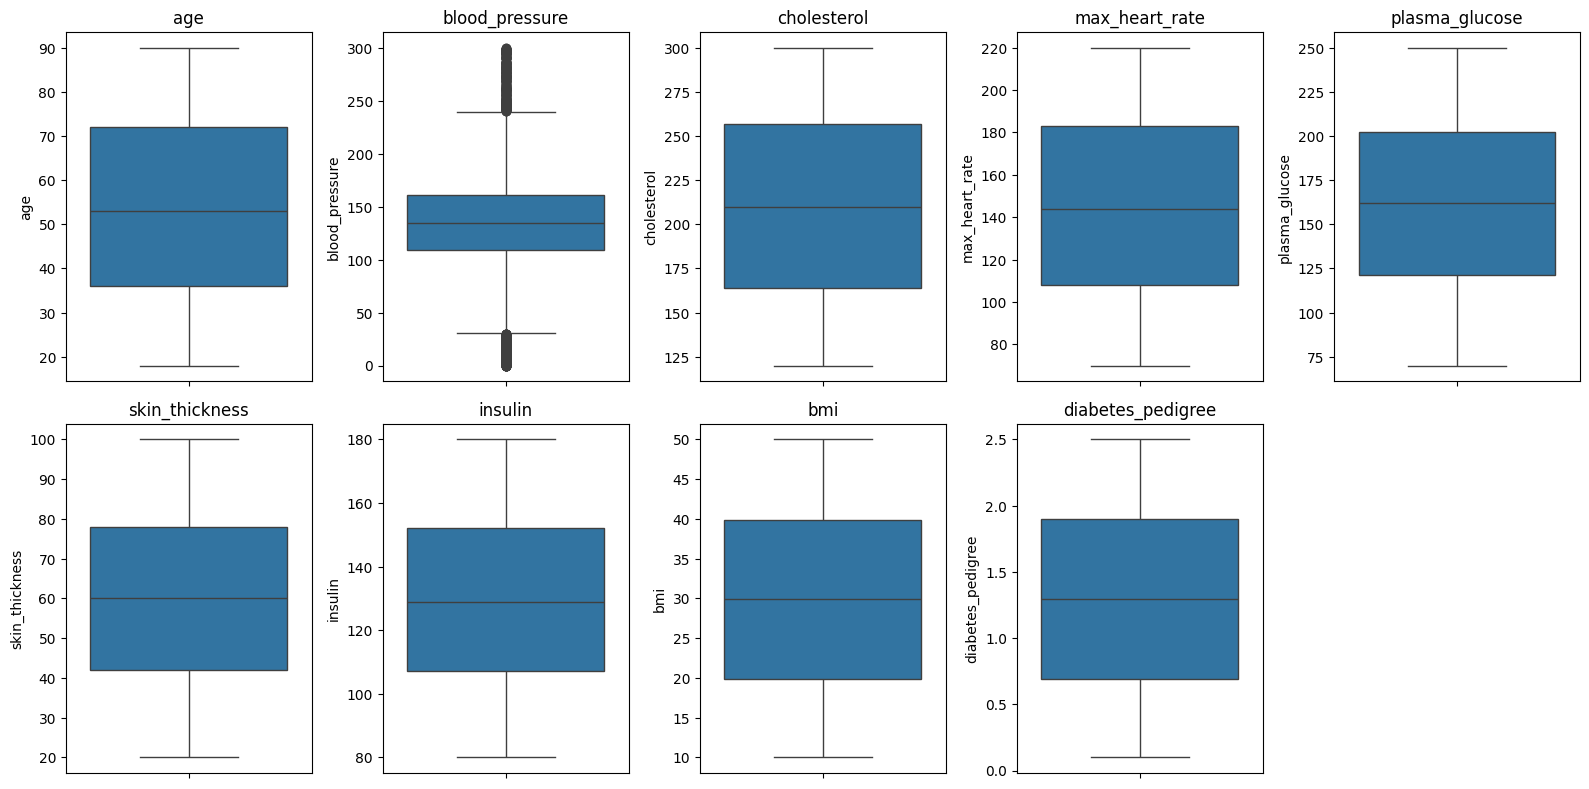

In [424]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

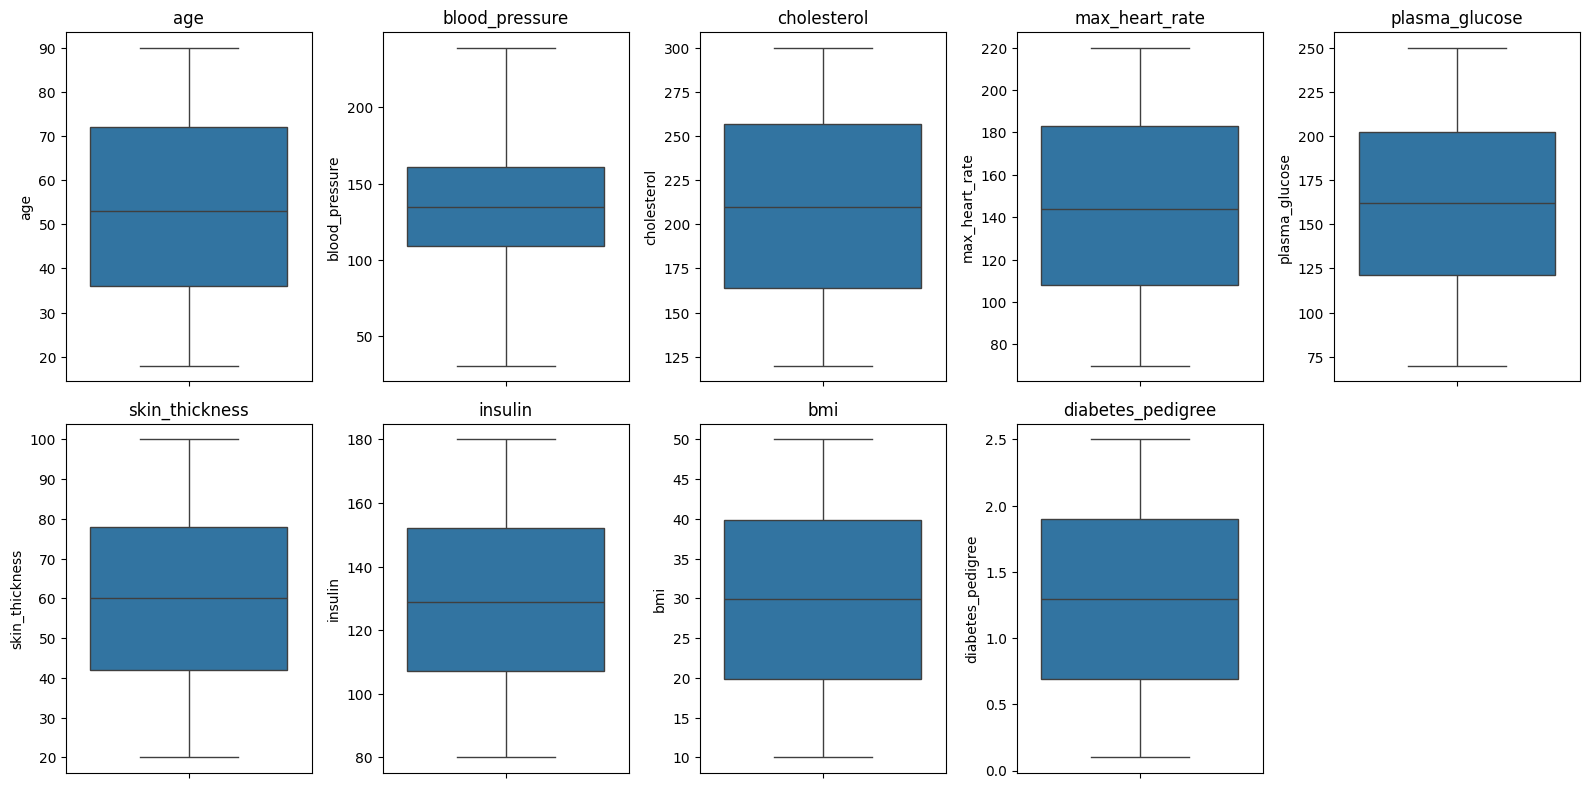

In [425]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [426]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [427]:
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24.0,1,3,239.0,139.0,212.0,0,108.0,33.0,109.0,37.999303,0.480277,1,1,1,1
1,29.0,0,3,132.0,187.0,147.0,0,202.0,42.0,129.0,25.588346,0.283986,1,1,1,2
2,46.0,0,2,239.0,185.0,193.0,0,149.0,43.0,102.0,37.892029,2.472309,1,0,0,0
3,73.0,0,1,102.0,200.0,125.0,0,105.0,77.0,165.0,18.660241,1.472052,0,1,0,1
4,49.0,1,2,91.0,163.0,192.0,0,162.0,31.0,170.0,12.767980,0.537627,1,1,0,1


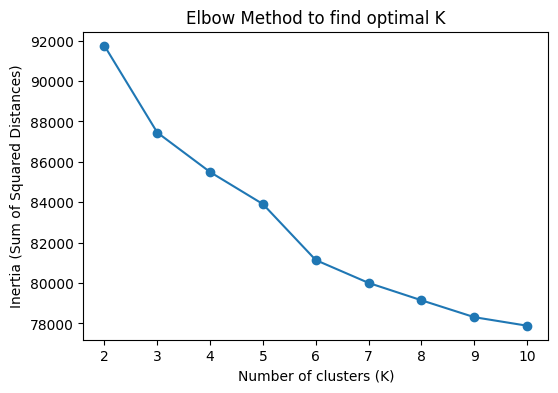

In [428]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,adjusted_rand_score

inertia = []
K_range = range(2, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method to find optimal K")
plt.show()

In [449]:
kmeans = KMeans(n_clusters=7, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
print(df['kmeans_cluster'].value_counts())

kmeans_cluster
5    1383
4     818
0     812
2     779
3     769
6     764
1     675
Name: count, dtype: int64


In [448]:
sil_score_km = silhouette_score(X_scaled, df['kmeans_cluster'])
print(f"Silhouette Score: {sil_score_km:.3f}")
ari_km = adjusted_rand_score(df['heart_disease'], df['kmeans_cluster'])
print(f"K-Means ARI: {ari_km:.3f}")

Silhouette Score: 0.053
K-Means ARI: 0.196


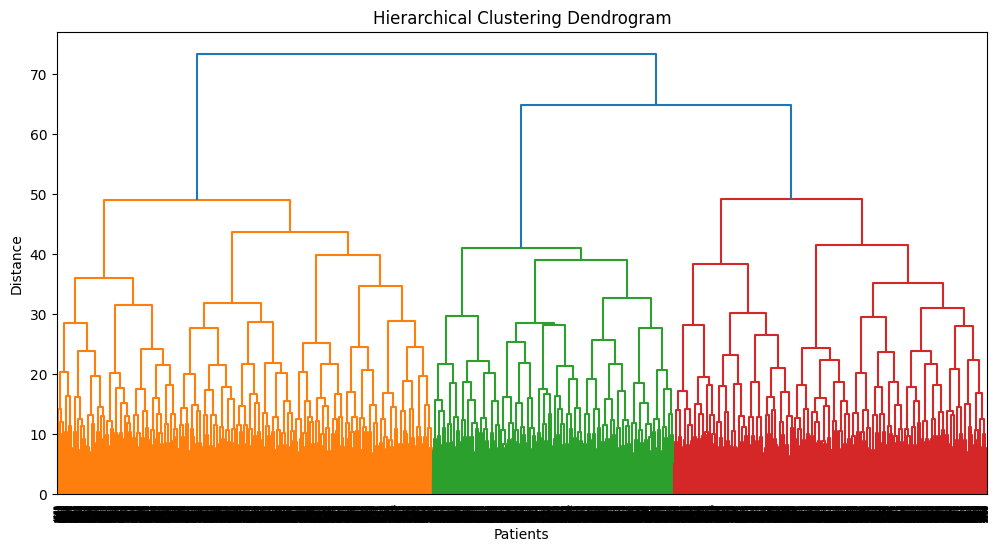

In [431]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()

In [450]:
df['hier_cluster'] = fcluster(Z, t=6, criterion='maxclust')
from sklearn.metrics import silhouette_score
print(df['hier_cluster'].value_counts())

hier_cluster
4    1558
6    1243
3     889
1     784
5     774
2     752
Name: count, dtype: int64


In [451]:
sil_score_hi = silhouette_score(X_scaled, df['hier_cluster'])
print(f"Silhouette Score: {sil_score_hi:.3f}")
ari_hi = adjusted_rand_score(df['heart_disease'], df['hier_cluster'])
print(f"Hier_cluster ARI: {ari_hi:.3f}")

Silhouette Score: 0.011
Hier_cluster ARI: 0.003


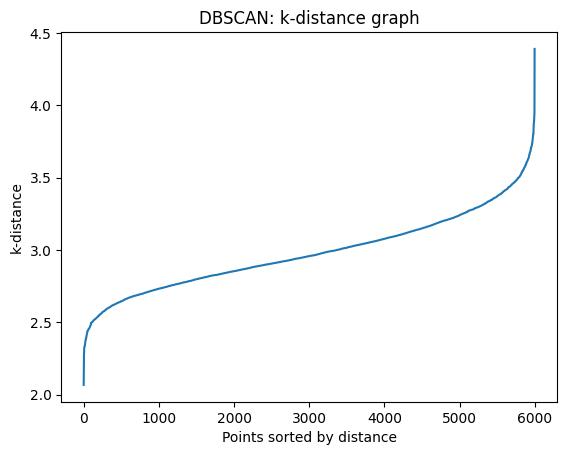

In [433]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,-1])
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("DBSCAN: k-distance graph")
plt.show()


In [434]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=8)  
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)
print(df['dbscan_cluster'].value_counts())

dbscan_cluster
-1     5316
 1       81
 7       36
 18      34
 17      23
 5       23
 13      21
 23      21
 20      19
 31      17
 33      17
 22      16
 3       16
 10      15
 34      14
 4       14
 11      14
 19      14
 12      13
 28      12
 29      12
 9       12
 24      12
 15      11
 32      10
 25      10
 49      10
 36       9
 30       9
 37       9
 27       8
 8        8
 0        8
 2        8
 50       8
 39       8
 45       8
 42       8
 38       8
 46       8
 43       8
 47       8
 41       8
 14       8
 21       7
 6        7
 44       7
 16       6
 48       6
 40       5
 35       5
 26       5
Name: count, dtype: int64


In [435]:
mask = df['dbscan_cluster'] != -1
sil_score_db = silhouette_score(X_scaled[mask], df['dbscan_cluster'][mask])
print(f"Silhouette Score: {sil_score_db:.3f}")
ari_db = adjusted_rand_score(df['heart_disease'], df['dbscan_cluster'])
print(f"DBSCAN_cluster ARI: {ari_db:.3f}")

Silhouette Score: 0.119
DBSCAN_cluster ARI: 0.001


In [436]:
print(f"{'Algorithm':<15} | {'Silhouette':<10} | {'ARI':<6}")
print(f"{'K-Means':<15} | {sil_score_km:<10.3f} | {ari_km:<6.3f}")
print(f"{'Hierarchical':<15} | {sil_score_hi:<10.3f} | {ari_hi:<6.3f}")
print(f"{'DBSCAN':<15} | {sil_score_db:<10.3f} | {ari_db:<6.3f}")

Algorithm       | Silhouette | ARI   
K-Means         | 0.053      | 0.196 
Hierarchical    | 0.011      | 0.003 
DBSCAN          | 0.119      | 0.001 
